### Import relevant Libraries

In [1]:
# import libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

import seaborn as sns
sns.set()

In [2]:
# load the preprocessed CSV data
redwine_preprocessed = pd.read_csv('redwine_preprocessed.csv')
redwine_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5


### Regression
We can also approach in predicting the dataset by using regression models. A regression model takes input values given for training and tries to use them to predict trends using the data.

The models we will be using are:
- Generalized Linear Regression
- Random Forest Regression
- Decision Tree Regression
- Gradient Boost Regression

#### Declare the inputs and the targets

In [3]:
# The target(s) (dependent variable)'
targets = redwine_preprocessed['quality']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = redwine_preprocessed.drop(['quality'],axis=1)

#### Scale the data

In [4]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [5]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create the Regression
##### Linear Regression

In [7]:
# Create a linear regression object
lrreg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
lrreg.fit(x_train,y_train)

LinearRegression()

In [8]:
# Let's check the outputs of the regression
lr_y_hat = lrreg.predict(x_train)

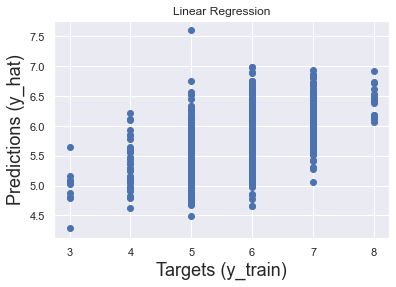

In [9]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, lr_y_hat)
plt.title('Linear Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

##### Random Forest Regression

In [10]:
# Create a random forest regression object
rfreg = RandomForestRegressor(random_state = 365, max_depth = 4)
# Fit the regression with the scaled TRAIN inputs and targets
rfreg.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, random_state=365)

In [11]:
# Let's check the outputs of the regression
rf_y_hat = rfreg.predict(x_train)

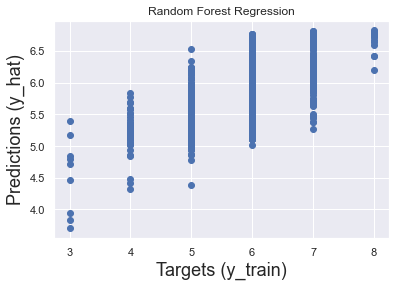

In [12]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, rf_y_hat)
plt.title('Random Forest Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

##### Decision Tree Regression

In [13]:
# Create a decisiontree regression object
dtreg = DecisionTreeRegressor(random_state = 365, max_depth = 4)
# Fit the regression with the scaled TRAIN inputs and targets
dtreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=365)

In [14]:
# Let's check the outputs of the regression
dt_y_hat = dtreg.predict(x_train)

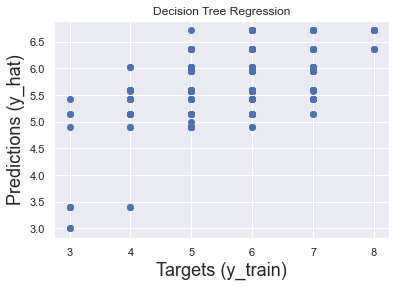

In [15]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, dt_y_hat)
plt.title('Decision Tree Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

##### Gradient Boosting Regression

In [16]:
# Create a decisiontree regression object
gbreg = GradientBoostingRegressor(max_depth = 4, random_state = 365)
# Fit the regression with the scaled TRAIN inputs and targets
gbreg.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=365)

In [17]:
# Let's check the outputs of the regression
gb_y_hat = gbreg.predict(x_train)

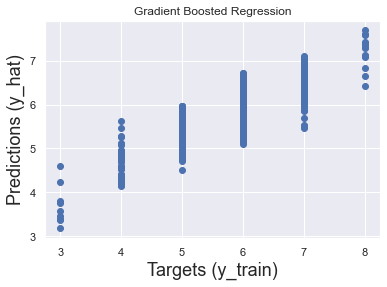

In [18]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train,gb_y_hat)
plt.title('Gradient Boosted Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

### Results 

In [19]:
# Find the R-squared of the model
print("Linear Regression R2 score: \t\t", round(metrics.r2_score(y_train, lr_y_hat), 2))
print('Linear Regression RMSE score: \t\t', np.sqrt(metrics.mean_squared_error(y_train, lr_y_hat)))

print("\nRandom Forest Regression R2 score: \t", round(metrics.r2_score(y_train, rf_y_hat), 2))
print('Random Forest Regression RMSE score: \t', np.sqrt(metrics.mean_squared_error(y_train, rf_y_hat)))

print("\nDecision Tree Regression R2 score: \t", round(metrics.r2_score(y_train, dt_y_hat), 2))
print('Decison Tree Regression RMSE score: \t', np.sqrt(metrics.mean_squared_error(y_train, dt_y_hat)))

print("\nGradient Boosted Regression R2 score: \t", round(metrics.r2_score(y_train, gb_y_hat), 2))
print('Gradient Boosted Regression RMSE score: ', np.sqrt(metrics.mean_squared_error(y_train, gb_y_hat)))

Linear Regression R2 score: 		 0.34
Linear Regression RMSE score: 		 0.652687710759208

Random Forest Regression R2 score: 	 0.47
Random Forest Regression RMSE score: 	 0.5874021446114377

Decision Tree Regression R2 score: 	 0.41
Decison Tree Regression RMSE score: 	 0.6169144756229479

Gradient Boosted Regression R2 score: 	 0.74
Gradient Boosted Regression RMSE score:  0.41345856048153456


Based on the scores above, the best model that therefore gives me the best R2 score is the **Gradient Boosted Regression model** at a R2 score of 0.74 and a RMSE score at 0.413.

### Testing

In [20]:
y_hat_test = gbreg.predict(x_test)

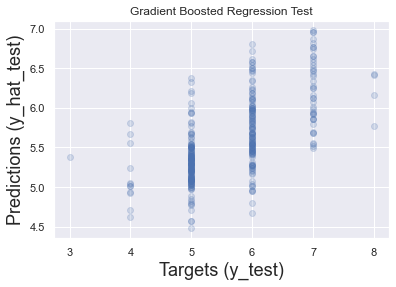

In [21]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.title('Gradient Boosted Regression Test')
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim()
plt.ylim()
plt.show()

In [22]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,293.933546
1,245.076813
2,532.919020
3,187.895690
4,321.310870


In [23]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,293.933546,1096.633158
1,245.076813,148.413159
2,532.919020,1096.633158
3,187.895690,148.413159
4,321.310870,148.413159
...,...,...
316,162.956817,148.413159
317,259.172264,403.428793
318,142.154840,403.428793
319,207.296546,148.413159


In [24]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,293.933546,1096.633158,802.699613,73.196730
1,245.076813,148.413159,-96.663654,65.131457
2,532.919020,1096.633158,563.714139,51.404076
3,187.895690,148.413159,-39.482531,26.603120
4,321.310870,148.413159,-172.897711,116.497561
...,...,...,...,...
316,162.956817,148.413159,-14.543658,9.799440
317,259.172264,403.428793,144.256529,35.757619
318,142.154840,403.428793,261.273954,64.763338
319,207.296546,148.413159,-58.883387,39.675314


In [25]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,321.000000,321.000000,321.000000,321.000000
mean,307.614139,401.361421,93.747282,53.150707
std,185.005206,426.020729,361.840679,77.487438
min,88.179202,20.085537,-504.423556,0.047064
25%,185.870760,148.413159,-64.164715,19.988034
50%,243.602292,403.428793,-8.127279,39.144685
75%,375.054545,403.428793,158.809909,62.591973
max,1071.370788,2980.957987,2659.694915,976.140517


In [26]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
17,148.34,148.41,0.07,0.05
113,402.25,403.43,1.18,0.29
88,149.07,148.41,-0.65,0.44
298,400.90,403.43,2.52,0.63
241,400.82,403.43,2.61,0.65
264,147.20,148.41,1.22,0.82
236,398.86,403.43,4.57,1.13
178,411.56,403.43,-8.13,2.01
311,145.37,148.41,3.05,2.05
166,151.68,148.41,-3.27,2.20


In [27]:
print("\nGradient Boosted Regression R2 score: \t", round(metrics.r2_score(y_test, y_hat_test), 2))
print('Gradient Boosted Regression RMSE score: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


Gradient Boosted Regression R2 score: 	 0.4
Gradient Boosted Regression RMSE score:  0.6320066441026528


**The training could have overfit the data, resulting in a failure during the testing phase.
<br>
The datasets could also not be compatible to regression data modelling, a change in information of the dataset could help.
<br>
Another reason could be because majority of the quality are valued at 5 and 6, which made no significant contribution to finding an optimal model.
<br>**